# NVIDIA Stock Market History

## Introduction
<p>This notebook explores the historical stock performance of NVIDIA Corporation (NVDA). The dataset contains daily records of NVDA’s stock prices, including the opening, closing, high, and low prices, as well as trading volume.</p>

<p>The goals of this project are to:</p>

<ul>
    <li>Analyse trends and patterns in NVIDIA’s stock prices.</li>
    <li> Visualise stock volatility and key metrics over time.</li>
    <li>Build a simple predictive model to forecast future closing prices.</li>
    <li>Provide useful insights that can support educational or investment-related decisions.</li>
</ul>

## Dataset Overview
<p>The dataset spans multiple years and includes the following features:</p>

<ul>
    <li>Date: Trading day</li>
    <li>Open: Opening stock price</li>
    <li>High: Highest price of the day</li>
    <li>Low: Lowest price of the day</li>
    <li>Close: Closing price</li>
    <li>Volume: Number of shares traded</li>
</ul>

<p>This data was sourced from Kaggle, and is ideal for financial trend analysis, statistical exploration, and beginner forecasting models.</p>

In [23]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [6]:
os.getcwd()

'C:\\Users\\Nigel\\Portfolio\\NVIDIA Stock Market History'

In [2]:
df = pd.read_csv("data/Nvidia_stock_data.csv")

In [3]:
df.head()

,Date,Close,High,Low,Open,Volume
0,1999-01-22,0.037612,0.044775,0.035581,0.040119,2714688000
1,1999-01-25,0.041552,0.042029,0.037612,0.040597,510480000
2,1999-01-26,0.038328,0.042865,0.037731,0.042029,343200000
3,1999-01-27,0.038209,0.039403,0.036298,0.038447,244368000
4,1999-01-28,0.038089,0.038447,0.037850,0.038209,227520000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6637 entries, 0 to 6636
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    6637 non-null   object 
 1   Close   6637 non-null   float64
 2   High    6637 non-null   float64
 3   Low     6637 non-null   float64
 4   Open    6637 non-null   float64
 5   Volume  6637 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 311.2+ KB


In [20]:
df['Date'] = pd.to_datetime(df['Date'])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6637 entries, 0 to 6636
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    6637 non-null   datetime64[ns]
 1   Close   6637 non-null   float64       
 2   High    6637 non-null   float64       
 3   Low     6637 non-null   float64       
 4   Open    6637 non-null   float64       
 5   Volume  6637 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 311.2 KB


## Exploratory Data Analysis

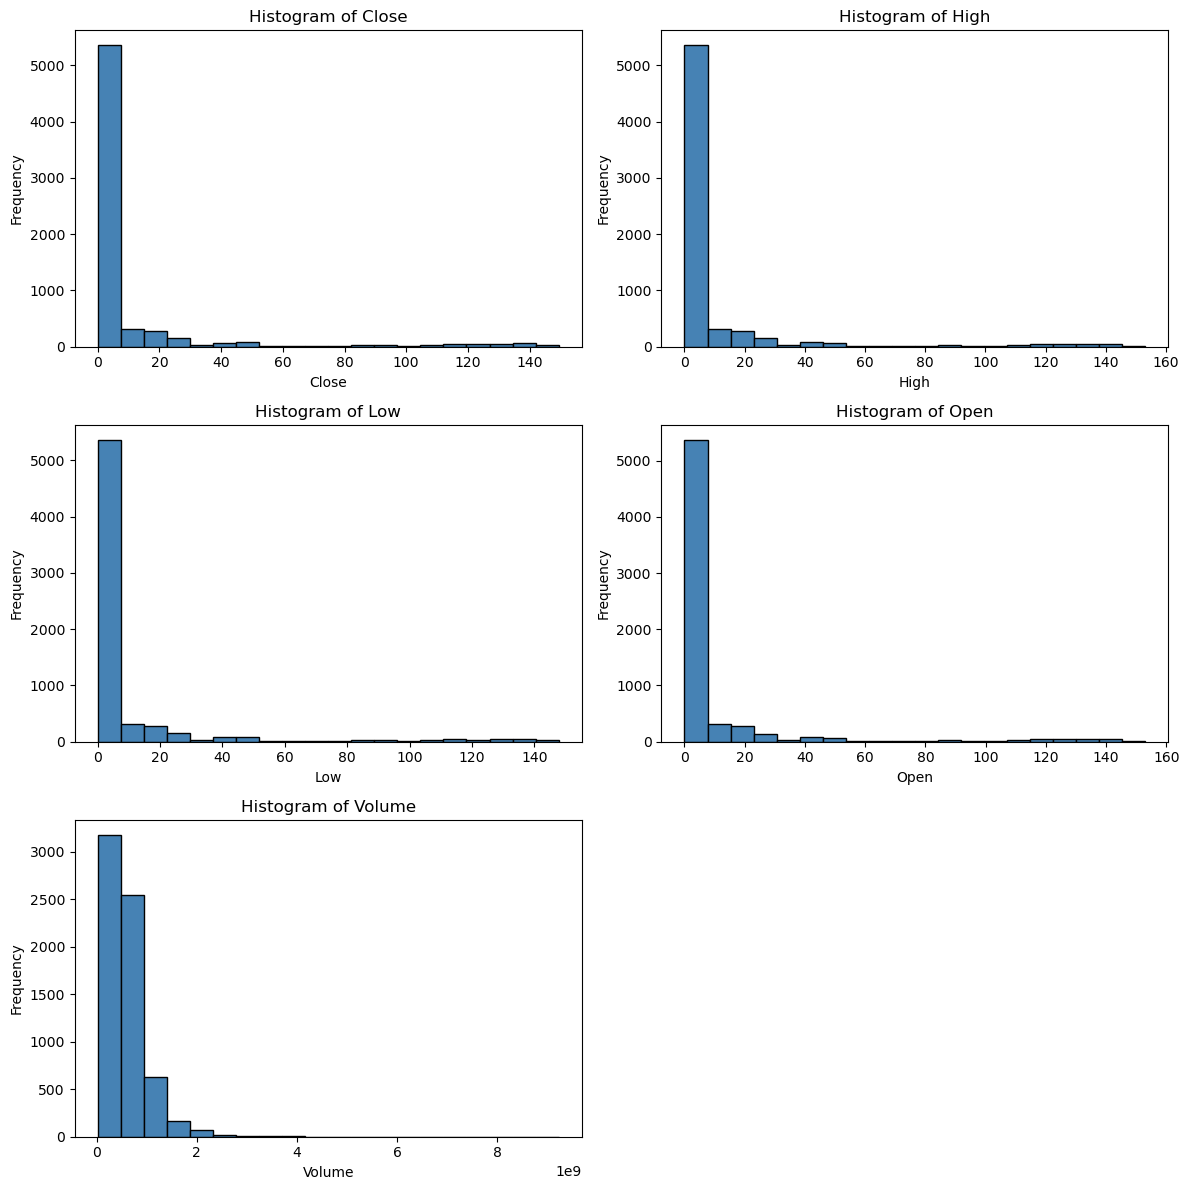

In [18]:
# Drop non-numeric 'Date' column
numeric_df = df.drop(columns=['Date'])

# Determine number of features
features = numeric_df.columns
n_features = len(features)

# Grid layout settings
cols = 2
rows = math.ceil(n_features / cols)

# Create subplot grid
fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 4))
axes = axes.flatten()

# Plot each histogram
for i, col in enumerate(features):
    axes[i].hist(numeric_df[col], bins=20, color='steelblue', edgecolor='black')
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide any unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

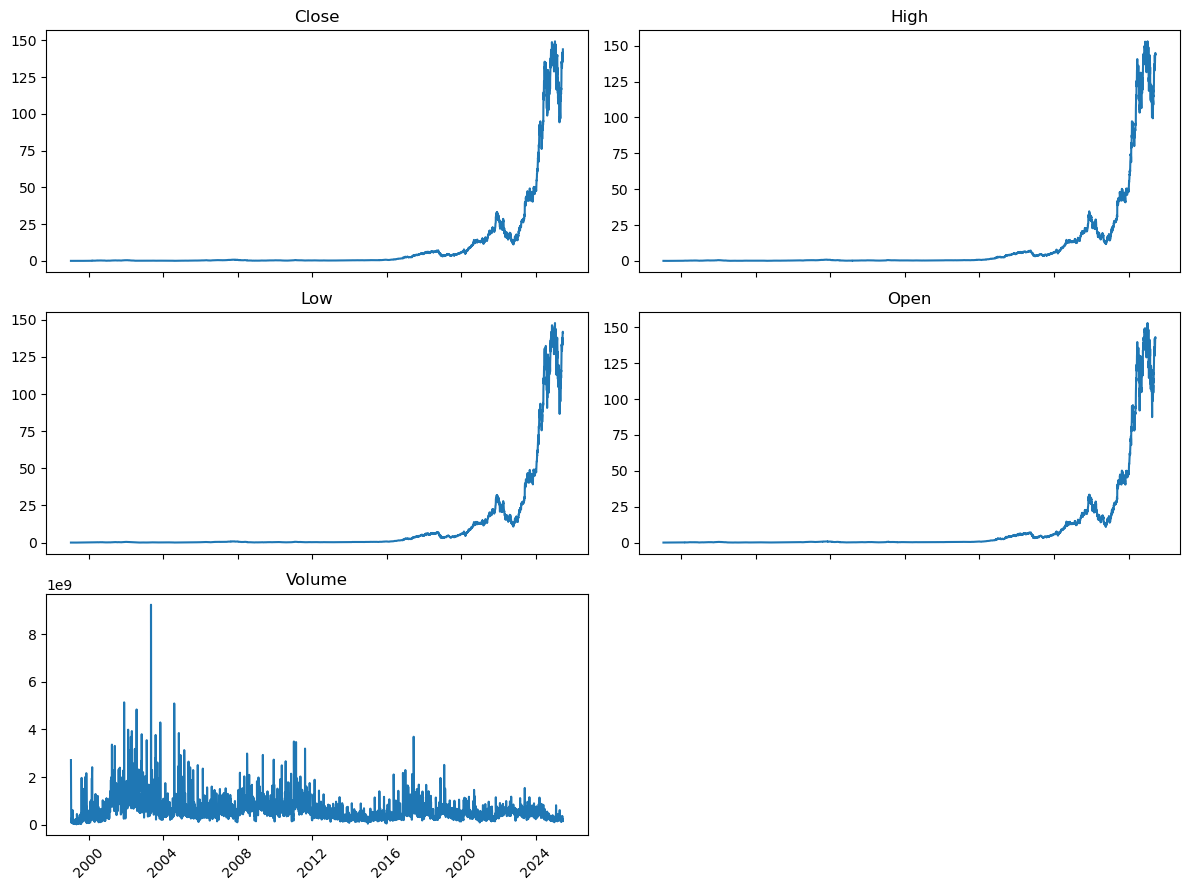

In [22]:
# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 3), sharex=True)
axes = axes.flatten()  # Flatten for easy indexing

# Plot each feature as a time series
for i, feature in enumerate(features):
    axes[i].plot(df['Date'], df[feature])
    axes[i].set_title(feature)
    axes[i].tick_params(axis='x', rotation=45)

# Hide unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout()
plt.show()

In [24]:
# Shift the Close column to use today’s price to predict tomorrow's
df["Target"] = df["Close"].shift(-1)

# Simple features
features = ["Open", "High", "Low", "Close", "Volume"]
df_model = df[features + ["Target"]].dropna()

X = df_model[features]
y = df_model["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Test MSE: {mse:.4f}")

Test MSE: 4.7328


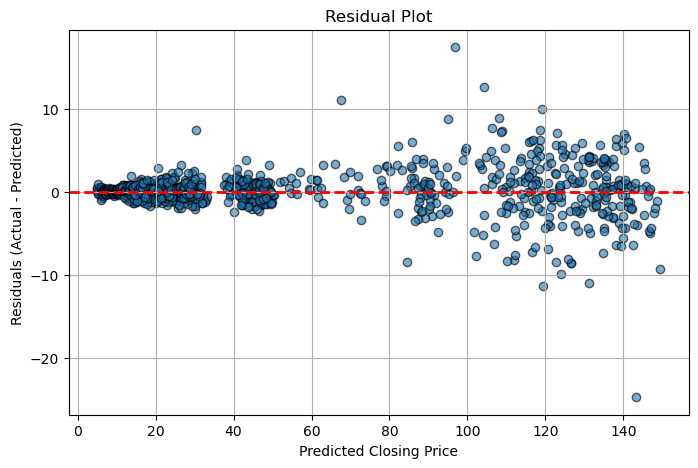

In [26]:
# Calculate residuals
residuals = y_test - y_pred

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals, alpha=0.6, edgecolors='k')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title("Residual Plot")
plt.xlabel("Predicted Closing Price")
plt.ylabel("Residuals (Actual - Predicted)")
plt.grid(True)
plt.show()

In [ ]:
# Plot predicted vs actual values
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.title("Predicted vs Actual Closing Prices")
plt.xlabel("Actual Closing Price")
plt.ylabel("Predicted Closing Price")
plt.grid(True)
plt.show()